In [1]:
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

import sys
sys.path.append('..')
from korr import pearson, corr_vs_pval

## Example 1 (Boston Dataset)
Load the demo dataset

In [2]:
data = load_boston()
cols = [0,1,2,4,5,6,7,8,9,10,11,12]
x = data.data[:,cols]

Compute Pearson correlations and its p-values.

In [3]:
r, pval = pearson(x)

Display the results in one histogram.
The default `rlim=0.4` is usually ok.
Play with `plim` argument until three colored categories emerge.

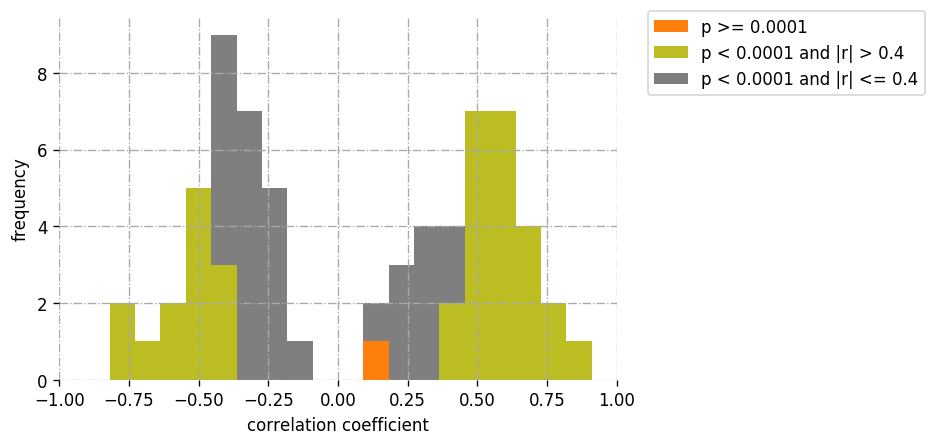

In [4]:
corr_vs_pval(r, pval, plim=0.0001, dpi=120);

The correlation coefficients among the variables of the Boston dataset exhibit low p-values.
I set the threshold at `0.0001` (or `0.01%`) and still very few correlation coefficients had higher p-values (orange bar). 

## Interpretations

**Unrelated variables as x predictors (orange)**. 
Two unrelated variables will yield higher p-values, i.e. its correlation coefficient has any value just by chance, or resp. its correlation coefficient is meaningless or even misleading.
Such a result can be actually helpful. If the p-Value of two variables' correlation coefficient is very high, then both variables are favorable candidates as explanatory variables (or predictors, features) in a multivariate linear regression model or resp. any other supervised learning algorithm.

**Candiates for y and x (green)**.
As a rule of thumb a correlation coefficient above $|r|>0.4$ can be considered useful. 
If the accompanying p-value is below the accepted threshold (e.g. `plim=0.0001` or `0.01%`) then these high correlations can be considered significant. The use case would be to take such a pair of significant highly correlated variables as `y` and `x` variables in a linear regression model (or resp . any other supervised learning algorithm).

**Dangerous Results (gray)**.
There is not point of using variable pairs with significant low correlation coefficient (e.g. $|r|\leq 0.4$ and p-value less than `0.0001`) if you have other significantly highly correlated pairs (green) or unrelated pairs (orange).

## Example 2 (Diabetes Dataset)
Load the demo dataset, compute the correlations and its coefficients, display everything in a histogram.

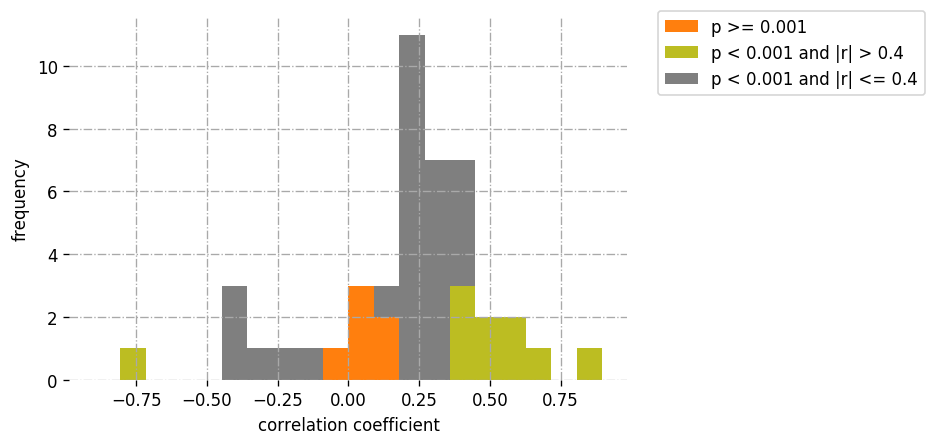

In [5]:
x = load_diabetes().data
r, pval = pearson(x)
corr_vs_pval(r, pval, plim=0.001, rlim=0.4, dpi=120);

The diabetes dataset is provided for regression tasks by the sklearn package.
As we only considered predictor variables `x`, the interpretation is as follows

* low p-value (orange): Start with these predictor pairs for a multivariate regression model.
* high rho, high p-value (green): These predictors might cause multicollinarity issue when used in the same multivariate regression model. Consider dimensionality reduction (e.g. PCA) to combine these predictors
* gray: Try to add these predictors lateron (e.g. forward variable selection)